### Importing the necessary libraries

In [1]:
import csv
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz

### Importing Data

In [61]:
# open the csv file and read it
data = pd.read_csv('diabetes_data_upload.csv')

### Exploratory data analysis (EDA)

In [47]:
# plotting the counts in respect to Gender, Obesity and class
fig1 = px.sunburst(data, path=['Gender','Obesity', 'class'], width=600, height=600, title='Gender-Obesity-Class').update_xaxes(categoryorder='total descending')
fig1.show()

In [50]:
#  plotting  class in respect to Gender and Age
fig2 = px.histogram(data, x="Age", color="class", width=800, height=400, facet_col='Gender')
fig2.show()

### Modifying data

In [53]:
# discretizing the Age data into three groups, based on the medical opinion for diabetes
data['Age'] = data['Age'].mask(data['Age'] < 40, 1)
data['Age'] = data['Age'].mask(data['Age'] >= 65, 3)
data['Age'] = data['Age'].mask(data['Age'] >= 40, 2)

In [62]:
# convert binary string data into 1 and 0 
data = data.mask(data == 'Yes', 1)
data = data.mask(data == 'No', 0)
data = data.mask(data == 'Male', 1)
data = data.mask(data == 'Female', 0)
data = data.mask(data == 'Positive', 1)
data = data.mask(data == 'Negative', 0)
data.iloc[:,:] = data.iloc[:,:].astype(int)

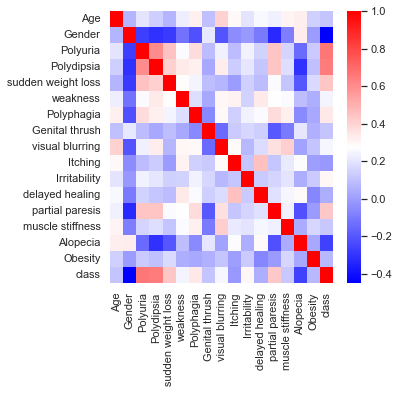

In [64]:
# plotting correlation heatmap
sns.set(rc = {'figure.figsize':(5,5)})
dataplot = sns.heatmap(data.corr(), cmap="bwr", annot=False)

# displaying heatmap
plt.show()

In [ ]:
# display the first 10 rows
data.head(10)

### Machine Learning Models
##### *Decision tree and logistic regression models were built becuase they are good algorithms for small datasets

#### Building the decision tree model

In [ ]:
# function responsible to create a decision tree based on the dataset you provide
def dtModel(dataset):
    # dividing dataset into X (features, input) and Y (class, output) 
    X = dataset.iloc[:,:len(dataset.columns)-1]
    Y = dataset.iloc[:,len(dataset.columns)-1]
    # splitting dataset intp X and Y train, and X and Y test subsets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
    # creating the classification model by building a decision tree
    dt = tree.DecisionTreeClassifier()
    # adjusting weights according to data values so that better accuracy can be achieved
    dt.fit(X_train, Y_train)

    # testing model and printing the classification report (quality of predictions)
    Y_pred = dt.predict(X_test)
    print(metrics.classification_report(Y_test,Y_pred))
    
    # displaying the confusion matrix on a heatmap
    mat = confusion_matrix(Y_test, Y_pred)
    labels = ['Negative', 'Positive']
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')

In [ ]:
# trying the model
dtModel(data)

#### Decision tree pruning

In [ ]:
# measuring k highest scores for each feature to lowering the overfitting
array = data.values
X = array[:,0:len(data.columns)-1]
Y = array[:,len(data.columns)-1]

# Feature extraction
test = SelectKBest(score_func=chi2)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

In [ ]:
# removing featrues that doesn't help in building the tree
dataNew = data.drop(columns=['Age', 'Itching', 'delayed healing', 'Genital thrush', 'muscle stiffness', 'Obesity'])

In [ ]:
# trying pruned model
dtModel(dataNew)

#### Building a logistic regression model

In [ ]:
# function responsible to create a logistic regression model based on the dataset you provide
def logReg(dataset):
    # dividing dataset into X (features, input) and Y (class, output) 
    x = dataset.iloc[:,:len(dataset.columns)-1]
    y = dataset.iloc[:,len(dataset.columns)-1]
    
    # splitting dataset intp X and Y train, and X and Y test subsets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
    
    # creating the classification model
    classifier = LogisticRegression(random_state = 0)
    # adjusting weights according to data values so that better accuracy can be achieved
    classifier.fit(x_train, y_train)
    
    # testing model and printing the classification report (quality of predictions)
    y_pred = classifier.predict(x_test)
    print(metrics.classification_report(y_test,y_pred))

    # displaying the confusion matrix on a heatmap
    mat = confusion_matrix(y_test, y_pred)
    labels = ['Negative', 'Positive']
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')


In [ ]:
logReg(data)

#### Building a neural network model

In [ ]:
# function responsible to create a neural network model based on the dataset you provide
def neuNet(dataset):
    # creating input features and class variables
    X = dataset.iloc[:,0:len(dataset.columns)-1]
    y = dataset.iloc[:,len(dataset.columns)-1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    
    classifier = Sequential()
    #First Hidden Layer
    classifier.add(Dense(2, activation='relu', kernel_initializer='random_normal', input_dim=len(dataset.columns)-1))
    #Second  Hidden Layer
    #classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
    #Output Layer
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
    
    #Compiling the neural network
    classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
    
    #Fitting the data to the training dataset
    classifier.fit(X_train,y_train, batch_size=10, epochs=100)
    
    eval_model = classifier.evaluate(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred>0.5)
    
    mat = confusion_matrix(y_test, y_pred)
    labels = ['Negative', 'Positive']
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    #ann_viz(classifier, title="Early stage diabetes risk prediction")

In [ ]:
neuNet(data)